In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers.experimental import RandomFourierFeatures
import datetime
from google.colab import drive
import pathlib

2.4.1


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train_dense), (x_test, y_test_dense) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# truncate the dataset to reduce computational cost
x_train, y_train_dense = x_train[:4000,:], y_train_dense[:4000]
x_test, y_test_dense = x_test[:4000,:], y_test_dense[:4000]

# flatten inputs and convert label to one-hot
x_train = tf.reshape(x_train, (x_train.shape[0], -1))
x_test = tf.reshape(x_test, (x_test.shape[0], -1))
y_train, y_test = tf.one_hot(y_train_dense, 10), tf.one_hot(y_test_dense, 10)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(4000, 784) (4000, 784)
(4000, 10) (4000, 10)


2 RFF FEATURES
tf.Tensor(
[[121  29   6  32  57   0 106   6   9   4]
 [  6 221  18  43  75   0   9  46  13  19]
 [ 36 133  14  32  85   0  65  28  19   6]
 [ 39  48  13 106  63   0  62  34  35   8]
 [ 19 177   7  13  80   0  66  34  15   7]
 [ 26  72   7 116  40   0  34  27  41   9]
 [106  36  11  30  70   0 113   6   2   4]
 [  9 230   7  24  36   0  18  46  40   1]
 [ 15 115  10  66  47   0  36  49  42   4]
 [ 22 117   9  63  47   0  30  42  52   9]], shape=(10, 10), dtype=int32)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features (Ran (None, 2)                 1571      
_________________________________________________________________
dense (Dense)                (None, 10)                30        
Total params: 1,601
Trainable params: 30
Non-trainable params: 1,571
_________________________________________________________________
max training accuracy 0.2405

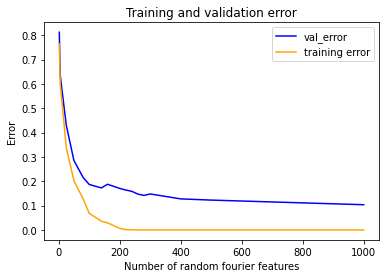

In [3]:
history_logs = []    
for N in [2, 5, 10, 25, 50, 80, 100, 140, 160, 200, 220, 240, 260, 280, 300, 400, 500] + list(map(lambda x:1000*x,range(1,2))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), verbose=0)

  history_logs.append((N, history))
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])

# plot errors over number of parameters
plt.title('Training and validation error')
plt.plot([i[0] for i in history_logs], [1-i[1].history['val_accuracy'][-1] for i in history_logs], color='blue', label='val_error')
plt.plot([i[0] for i in history_logs], [1-i[1].history['accuracy'][-1] for i in history_logs], color='orange', label='training error')
plt.xlabel('Number of random fourier features')
plt.ylabel('Error')
plt.legend()

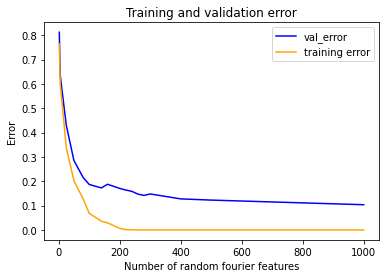

In [4]:
# plot errors over number of parameters
plt.title('Training and validation error')
plt.plot([i[0] for i in history_logs], [1-i[1].history['val_accuracy'][-1] for i in history_logs], color='blue', label='val_error')
plt.plot([i[0] for i in history_logs], [1-i[1].history['accuracy'][-1] for i in history_logs], color='orange', label='training error')
plt.xlabel('Number of random fourier features')
plt.ylabel('Error')
plt.legend()

2 RFF FEATURES
tf.Tensor(
[[ 73  65  82   6  38   0  23  57   0  26]
 [  0 352  11   7   5   0  18  57   0   0]
 [ 26 197 105   2  10   0  23  43   0  12]
 [ 11 195  15   5  12   0  20 130   0  20]
 [ 72  74  71   5  27   0  27 124   0  18]
 [ 37 118  30   2  19   0  15 123   0  28]
 [ 24 128  96   7  24   0  25  62   0  12]
 [ 25 134  18   6  32   0  15 155   0  26]
 [ 52 100  37   8  24   0  17 113   0  33]
 [ 39  80  32   4  24   0  17 167   0  28]], shape=(10, 10), dtype=int32)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_18 ( (None, 2)                 1571      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                30        
Total params: 1,601
Trainable params: 30
Non-trainable params: 1,571
_________________________________________________________________
max training accuracy 0.2

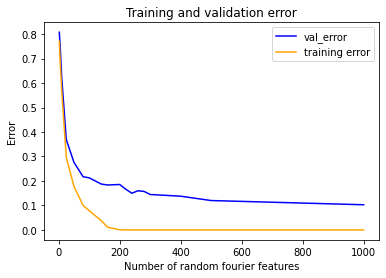

In [5]:
history_logs_2 = []    
for N in [2, 5, 10, 25, 50, 80, 100, 140, 160, 200, 220, 240, 260, 280, 300, 400, 500] + list(map(lambda x:1000*x,range(1,2))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), verbose=0)

  history_logs_2.append((N, history))
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])

# plot errors over number of parameters
plt.title('Training and validation error')
plt.plot([i[0] for i in history_logs_2], [1-i[1].history['val_accuracy'][-1] for i in history_logs_2], color='blue', label='val_error')
plt.plot([i[0] for i in history_logs_2], [1-i[1].history['accuracy'][-1] for i in history_logs_2], color='orange', label='training error')
plt.xlabel('Number of random fourier features')
plt.ylabel('Error')
plt.legend()

2 RFF FEATURES
tf.Tensor(
[[ 56  46  83   3  28   1   0 144   0   9]
 [  8 153 137  24  84  19   0  14   0  11]
 [  3  78 206  16  14   4   0  94   0   3]
 [ 11 221  73  17  30  22   0  20   0  14]
 [ 36 144  90   3  75  20   0  40   0  10]
 [  4 193  55  11  59  21   0  24   0   5]
 [  9 158  94  14  40  24   0  37   0   2]
 [ 26  50 132   6  16   2   0 171   0   8]
 [  8 193  86  16  34  17   0  25   0   5]
 [ 39  97  66   8  63  16   0  91   0  11]], shape=(10, 10), dtype=int32)
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_37 ( (None, 2)                 1571      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                30        
Total params: 1,601
Trainable params: 30
Non-trainable params: 1,571
_________________________________________________________________
max training accuracy 0.2

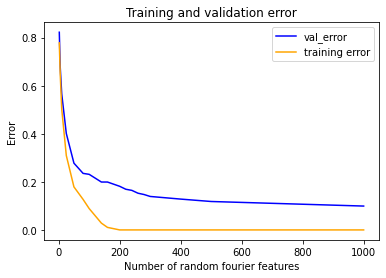

In [8]:
# USING SGD WITH MOMENTUM
history_logs_2 = []    
for N in [2, 5, 10, 25, 50, 80, 100, 140, 160, 200, 220, 240, 260, 280, 300, 400, 500] + list(map(lambda x:1000*x,range(1,2))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])

  opt = tf.keras.optimizers.SGD(momentum=0.95)
  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), verbose=0)

  history_logs_2.append((N, history))
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])

# plot errors over number of parameters
plt.title('Training and validation error')
plt.plot([i[0] for i in history_logs_2], [1-i[1].history['val_accuracy'][-1] for i in history_logs_2], color='blue', label='val_error')
plt.plot([i[0] for i in history_logs_2], [1-i[1].history['accuracy'][-1] for i in history_logs_2], color='orange', label='training error')
plt.xlabel('Number of random fourier features')
plt.ylabel('Error')
plt.legend()

2 RFF FEATURES
tf.Tensor(
[[  0  96  49   3  27   0  59 128   0   8]
 [  0 283  70  11  29   0  44  10   0   3]
 [  0 166  63   2  33   0  77  69   0   8]
 [  0 185  54   5  30   0  76  52   0   6]
 [  0 114  50   3  35   0  81 127   0   8]
 [  0 111  51   4  33   0  62 105   0   6]
 [  0 124  31   5  24   0 112  74   0   8]
 [  0  71  35   5  26   0  48 217   0   9]
 [  0 146  38   4  39   0  79  64   0  14]
 [  0  79  30   2  43   0  76 157   0   4]], shape=(10, 10), dtype=int32)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features (Ran (None, 2)                 1571      
_________________________________________________________________
dense (Dense)                (None, 10)                30        
Total params: 1,601
Trainable params: 30
Non-trainable params: 1,571
_________________________________________________________________
max training accuracy 0.2010

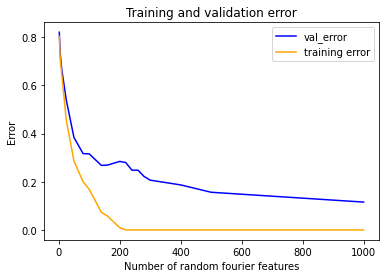

In [3]:
history_logs_2 = []    
for N in [2, 5, 10, 25, 50, 80, 100, 140, 160, 200, 220, 240, 260, 280, 300, 400, 500] + list(map(lambda x:1000*x,range(1,2))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=5.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), verbose=0)

  history_logs_2.append((N, history))
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])

# plot errors over number of parameters
plt.title('Training and validation error')
plt.plot([i[0] for i in history_logs_2], [1-i[1].history['val_accuracy'][-1] for i in history_logs_2], color='blue', label='val_error')
plt.plot([i[0] for i in history_logs_2], [1-i[1].history['accuracy'][-1] for i in history_logs_2], color='orange', label='training error')
plt.xlabel('Number of random fourier features')
plt.ylabel('Error')
plt.legend()

In [4]:
import pickle
pickle.dump([(i[0], i[1].history) for i in history_logs_2], open( "RFF_scale=5.p", "wb" ) )

In [ ]:
history_logs_3 = []    
for N in [2, 5, 10, 25, 50, 80, 100, 140, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 240, 260, 280, 300, 400, 500] + list(map(lambda x:1000*x,range(1,2))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=5.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), verbose=0)

  history_logs_3.append((N, history))
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])

# plot errors over number of parameters
plt.title('Training and validation error')
plt.plot([i[0] for i in history_logs_3], [1-i[1].history['val_accuracy'][-1] for i in history_logs_3], color='blue', label='val_error')
plt.plot([i[0] for i in history_logs_3], [1-i[1].history['accuracy'][-1] for i in history_logs_3], color='orange', label='training error')
plt.xlabel('Number of random fourier features')
plt.ylabel('Error')
plt.legend()